In [79]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import pandas as pd
import seaborn as sns

In [ ]:
dataset_dir = r'D:\Projects\Forest_Fire_Detection\Dataset'
fire_dir = os.path.join(dataset_dir, 'fire')
not_fire_dir = os.path.join(dataset_dir, 'nofire')
output_dir = os.path.join(dataset_dir, 'processed_data')

os.makedirs(output_dir, exist_ok=True)

Fire images directory: D:\Projects\Forest_Fire_Detection\Dataset\fire
No fire images directory: D:\Projects\Forest_Fire_Detection\Dataset\nofire
Output directory: D:\Projects\Forest_Fire_Detection\Dataset\processed_data


In [ ]:
IMG_SIZE = (96, 96)
SEED = 42

In [82]:
def preprocess_image(image):
    image = cv2.resize(image, IMG_SIZE)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 255.0
    image = image * 2.0 - 1.0  # [-1, 1] normalization
    return image


def load_dataset():
    images = []
    labels = []
    class_names = []

    for folder, label, class_name in [(fire_dir, 1, 'fire'), (not_fire_dir, 0, 'nofire')]:
        for filename in os.listdir(folder):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = preprocess_image(img)
                    images.append(img)
                    labels.append(label)
                    class_names.append(class_name)

    return np.array(images), np.array(labels), np.array(class_names)

In [ ]:
images, labels, class_names = load_dataset()

print("\nDataset Summary:")
print(f"Total images: {len(images)}")
print(f"Fire images: {np.sum(labels == 1)}")
print(f"No fire images: {np.sum(labels == 0)}")

Loading dataset...

Dataset Summary:
Total images: 1949
Fire images: 954
No fire images: 995


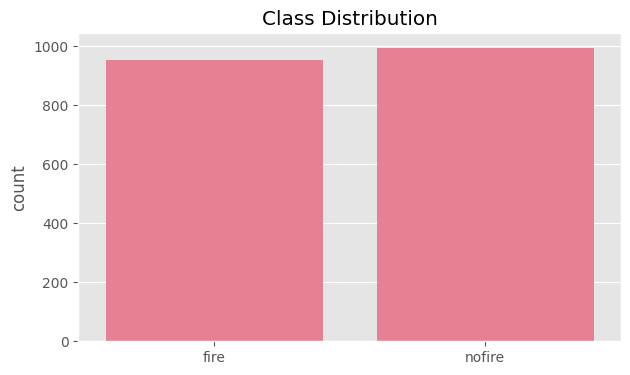

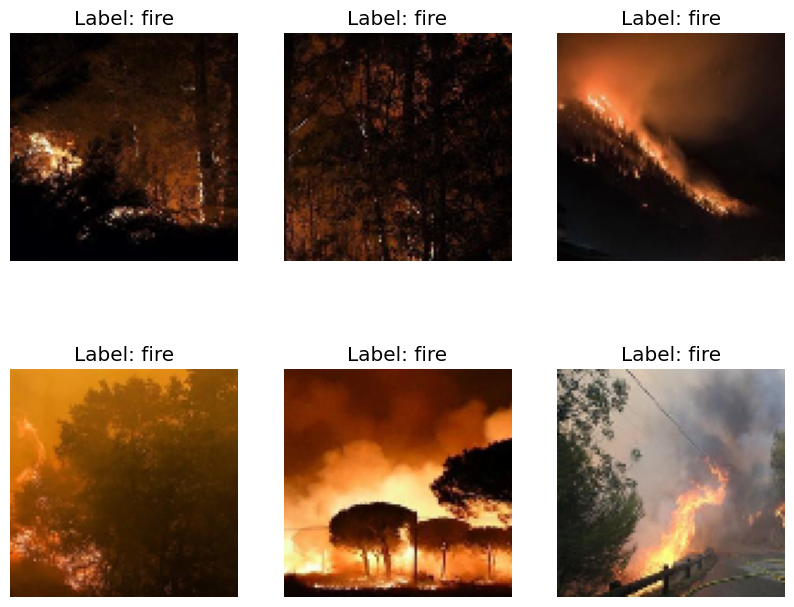

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(x=class_names)
plt.title('Class Distribution')
plt.savefig(os.path.join(output_dir, 'class_distribution.png'))
plt.show()

# Display sample images
plt.figure(figsize=(10, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    img = (images[i] + 1) / 2 
    plt.imshow(img)
    plt.title(f"Label: {class_names[i]}")
    plt.axis('off')
plt.savefig(os.path.join(output_dir, 'sample_images.png'))
plt.show()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    images, labels, test_size=0.2, random_state=SEED, stratify=labels
)